# Classy Thermodynamics module

Again, we import the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


Let's start with something simple and plot the ionization history, and the visibility function. First we define our cosmology and get the thermodynamics array.

Increasing the verbosity of the Thermodynamics module will give us some information on its results immediately.

In [3]:
cosmo = Class()
cosmo.set({'thermodynamics_verbose':1})
th = cosmo.get_thermodynamics()

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2453
 -> recombination (maximum of visibility function) at z = 1088.772283
    corresponding to conformal time = 280.650572 Mpc
    with comoving sound horizon = 144.510391 Mpc
    angular diameter distance = 12.728574 Mpc
    sound horizon angle 100*theta_s = 1.041798
    Thomson optical depth crosses one at z_* = 1085.125749
    giving an angle 100*theta_* = 1.044146
 -> baryon drag stops at z = 1059.919233
    corresponding to conformal time = 286.316634 Mpc
    with comoving sound horizon rs = 147.071615 Mpc
 -> reionization with optical depth = 0.054311
    corresponding to conformal time = 5127.540389 Mpc


We can also extract some of this information as so-called "derived parameters" - these are single-value parameters to describe the results rather than arrays of data. Examples are e.g. the conformal time of reionization and recombination, as presented here. A full list is available onlinine in the [readthedocs documentation](https://class-code.readthedocs.io/en/latest/wrapper_params.html#parameters).

In [4]:
der=cosmo.get_current_derived_parameters(['tau_rec','conf_time_reio'])

To get the exact syntax for the thermodynamics array dictionary, we can once again print the keys.

In [5]:
print(th.keys())

dict_keys(['scale factor a', 'z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])


We can then easily plot the ionization history of the universe, $x_e (z)$. Let's explicitly add the times of recombination and reionization as well.

Since these are given in terms of conformal time in the `der` dictionary we defined, they need to be converted to redshifts for this plot, which is easily done with the `z_of_tau` function.

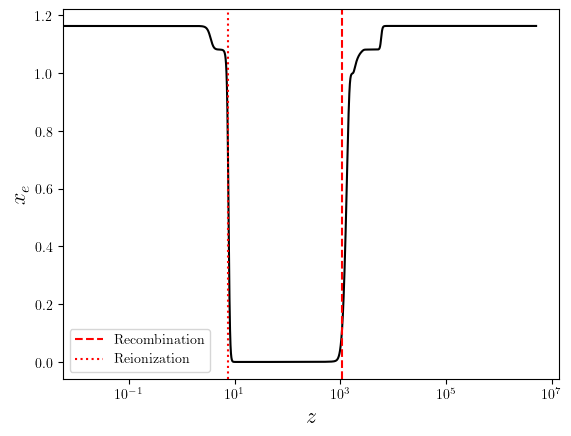

In [ ]:
z = th['z']
x_e = th['x_e']

plt.semilogx(z,x_e,'k')

z_rec = cosmo.z_of_tau(der['tau_rec'])
z_reio = cosmo.z_of_tau(der['conf_time_reio'])

plt.axvline(z_rec,color='r',linestyle='--',label='Recombination')
plt.axvline(z_reio,color='r',linestyle=':',label='Reionization')

plt.legend()

plt.xlabel('$z$',fontsize=16)
plt.ylabel('$x_e$',fontsize=16)

We can also easily plot the visibility function $g(z)$, which tells us how many photons we expect to see in the CMB from any given redshift.

Text(0, 0.5, '$g$ [Mpc$^-1$]')

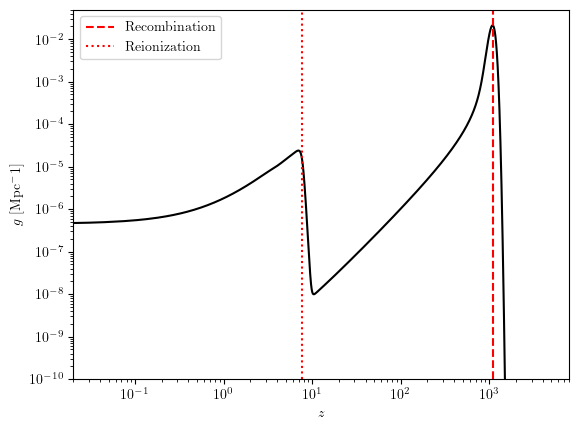

In [ ]:
g = th['g [Mpc^-1]']

plt.loglog(z,g, 'k')

plt.axvline(z_rec,color='r',linestyle='--',label='Recombination')
plt.axvline(z_reio,color='r',linestyle=':',label='Reionization')

plt.legend()

plt.ylim([1e-10,0.05])
plt.xlim([0.02,8e3])

plt.xlabel('$z$')
plt.ylabel('$g$ [Mpc$^-1$]')

It is very clear that the recombination peak is orders of magnitude larger than anything else, and that we receive essentially no pre-recombination photons.

However, it can also be seen that despite us denoting these events with a single redshift $z_\text{rec}$ or $z_\text{reio}$, they are not instantaneous processes.

Let's now look at a more exotic cosmology as well, and introduce an interaction between baryons and the dark matter. In addition to coupling their perturbation equations (as we will see in a later exercise), this will affect the thermal history of the baryons and the dark matter.

For our example here, let us look at 90% of the DM interacting through a Coulomb-like interaction (meaning $n=-4$) with a dark matter mass of 1 MeV and a cross section $\sigma_\text{b-DM} = 10^{-40}$ $\text{cm}^{2}$.

In [ ]:
cosmo_int = Class()
cosmo_int.set({'f_idm':0.9, 
               'm_idm':1e6, 
               'cross_idm_b':1e-40, 
               'n_index_idm_b': -4,
               'thermodynamics_verbose':1})

th_int = cosmo_int.get_thermodynamics()

Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2453
 -> recombination (maximum of visibility function) at z = 1088.772423
    corresponding to conformal time = 280.650545 Mpc
    with comoving sound horizon = 144.510379 Mpc
    angular diameter distance = 12.728573 Mpc
    sound horizon angle 100*theta_s = 1.041798
    Thomson optical depth crosses one at z_* = 1085.152726
    giving an angle 100*theta_* = 1.044128
 -> baryon drag stops at z = 1059.923858
    corresponding to conformal time = 286.315705 Mpc
    with comoving sound horizon rs = 147.071196 Mpc
 -> reionization with optical depth = 0.054305
    corresponding to conformal time = 5127.540389 Mpc


Let's see how the inclusion of the interacting dark matter species has added new keys to the thermodynamics array dictinary.

In [8]:
print(th_int.keys())

dict_keys(['scale factor a', 'z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'T_idm [K]', 'c_idm^2', 'R_idm_b', 'tau_d'])


We can see that a temperature have been added for the interacting dark matter component (idm), since it is now necessary to track as it is coupled to the visible sector.

Let's plot the baryon temperature evolution for both cosmologies, as well as the interacting DM temperature evolution, and the photon temperature. The latter can be extracted with `T_cmb()` and just multiplied by the redshift.

Text(0, 0.5, '$T$ [K]')

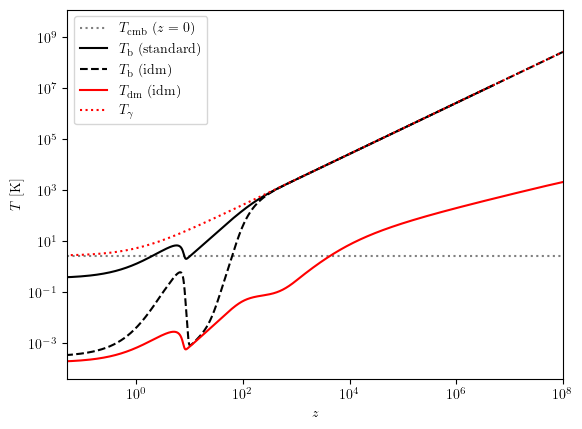

In [13]:
# As the DM-baryon interactions necessitate tracking the temperature back to an earlier time, 
# the thermodynamics array is automatically extended to higher redshifts. The z-array from our
# standard cosmology can therefore no longer be used for both. As a rule of thumb, it it always good
# to check that z arrays are identical before sharing them between cosmologies.


z_int = th_int['z']

Tcmb=cosmo.T_cmb()

Tb = th['Tb [K]']
Tb_int = th_int['Tb [K]']
Tdm_int = th_int['T_idm [K]']
Tphot = Tcmb*(z_int+1)

plt.axhline(Tcmb,color='0.5',linestyle=':',label='$T_\\mathrm{cmb}$ ($z=0$)')

plt.loglog(z,Tb, 'k', label='$T_\\mathrm{b}$ (standard)')
plt.loglog(z_int,Tb_int, 'k--', label='$T_\\mathrm{b}$ (idm)')
plt.loglog(z_int,Tdm_int, 'r', label='$T_\\mathrm{dm}$ (idm)')
plt.loglog(z_int,Tphot, 'r:', label='$T_\\gamma$')

plt.legend()

plt.xlim([0.05,1e8])

plt.xlabel('$z$')
plt.ylabel('$T$ [K]')

It is clear that the baryon temperature is driven by its strong coupling to photons at early times, until they decouple and the baryons have their own evolution.

In the standard cosmology, the baryon temperature will then drop at $T\propto a^{-2}$ as they are non-relativistic particles, while in the interacting DM cosmology, their coupling will mean that their temperatures equilibrate and $T_\text{b}$ drops much quicker, before tracking the DM's $T\propto a^{-2}$ until reionization.